In [21]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [30]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [10]:
all_files = glob.glob('/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData*.xls')
all_files

['/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData (0).xls',
 '/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData (1).xls',
 '/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData (2).xls',
 '/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData (3).xls',
 '/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData (4).xls',
 '/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData (9).xls',
 '/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData (5).xls',
 '/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/keywordsData/myCabinetExcelData (6).xls',
 '/content/drive/MyDrive/Colab Notebooks/Github/

In [14]:
all_files_data = []

for file in all_files:
  data_frame = pd.read_excel(file)
  all_files_data.append(data_frame)

# all_files_data[0]

all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Architecting Time-Critical Big-Data Systems,"Basanta-Val, P.; Audsley, N. C.; Wellings, A. ...",unknown,2016
1,NaN,2,Computation migration: a new approach to execu...,"Nunes, Rickey T. P.; Deshpande, Santosh L.",Inderscience,2018
2,NaN,3,A Game Theoretic Approach for Addressing Domai...,"Raghavan, Krishnan",unknown,2022
3,NaN,4,A trust-based crowdfunding campaign marketing ...,"Baah-Peprah, Prince; Shneor, Rotem",Inderscience,2021
4,NaN,5,Scientific Training in the Era of Big Data: A ...,unknown,Mary Ann Leibert,2017
...,...,...,...,...,...,...
995,NaN,96,The Big To Do About “Big Data”,"Schilling, P. L.; Bozic, K. J.",LIPPINCOTT WILLIAMS & WILKINS,2014
996,NaN,97,A big data-driven framework for sustainable an...,"Majeed, Arfan; Zhang, Yingfeng; Ren, Shan; Lv,...","Elsevier Science B.V., Amsterdam.",2021
997,NaN,98,`Small Data' Enabled Prediction Of Obama's Win...,"Hyman, P.",ACM ASSOCIATION FOR COMPUTING MACHINERY,2013
998,NaN,99,A big data-driven dynamic estimation model of ...,"Lin, Anqi; Wu, Hao; Liang, Guanghua; Cardenas-...","Elsevier Science B.V., Amsterdam",2020


In [19]:
all_files_data_concat.to_csv('/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/riss_bigdata.csv', encoding='utf-8-sig', index=False)

<h3> 데이터 전처리 </h3>

In [20]:
all_title = all_files_data_concat['제목']

all_title

0            Architecting Time-Critical Big-Data Systems
1      Computation migration: a new approach to execu...
2      A Game Theoretic Approach for Addressing Domai...
3      A trust-based crowdfunding campaign marketing ...
4      Scientific Training in the Era of Big Data: A ...
                             ...                        
995                       The Big To Do About “Big Data”
996    A big data-driven framework for sustainable an...
997    `Small Data' Enabled Prediction Of Obama's Win...
998    A big data-driven dynamic estimation model of ...
999                    Feedback Big Data-Based Lie Robot
Name: 제목, Length: 1000, dtype: object

In [26]:
stopWords = set(stopwords.words("english")) #영어 불용어를 불러와서 저장
lemma = WordNetLemmatizer() #단어의 기본형으로 변환

In [31]:
words = []

for title in all_title:
  EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
  EnWordsToken = word_tokenize(EnWords.lower())
  EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
  EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
  words.append(EnWordsTokenStopLemma)

In [33]:
#2차원 리스트를 1차원 리스트로 변환
words2 = list(reduce(lambda x, y:x+y, words))
print(words2)

['architecting', 'time', 'critical', 'big', 'data', 'system', 'computation', 'migration', 'new', 'approach', 'execute', 'big', 'data', 'bioinformatics', 'workflow', 'game', 'theoretic', 'approach', 'addressing', 'domain', 'shift', 'big', 'data', 'trust', 'based', 'crowdfunding', 'campaign', 'marketing', 'framework', 'theoretical', 'underpinnings', 'big', 'data', 'analytics', 'practice', 'scientific', 'training', 'era', 'big', 'data', 'new', 'pedagogy', 'graduate', 'education', 'diversity', 'big', 'data', 'review', 'big', 'scholarly', 'data', 'survey', 'role', 'teamwork', 'analysis', 'big', 'data', 'study', 'visual', 'analytics', 'box', 'office', 'prediction', 'call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system', 'societal', 'digital', 'transformation', 'scalable', 'data', 'quality', 'big', 'data', 'pythia', 'framework', 'handling', 'missing', 'value', 'call', 'special', 'issue', 'paper', 'big', 'data', 'driven', 'futuristic', 'fabric', 'system'

In [34]:
count = Counter(words2)
count

Counter({'architecting': 1,
         'time': 25,
         'critical': 7,
         'big': 1117,
         'data': 1255,
         'system': 63,
         'computation': 3,
         'migration': 1,
         'new': 36,
         'approach': 67,
         'execute': 1,
         'bioinformatics': 2,
         'workflow': 3,
         'game': 3,
         'theoretic': 2,
         'addressing': 2,
         'domain': 3,
         'shift': 3,
         'trust': 1,
         'based': 102,
         'crowdfunding': 2,
         'campaign': 2,
         'marketing': 6,
         'framework': 39,
         'theoretical': 6,
         'underpinnings': 1,
         'analytics': 123,
         'practice': 8,
         'scientific': 9,
         'training': 3,
         'era': 27,
         'pedagogy': 1,
         'graduate': 2,
         'education': 7,
         'diversity': 1,
         'review': 24,
         'scholarly': 4,
         'survey': 21,
         'role': 12,
         'teamwork': 1,
         'analysis': 93,
        

In [39]:
#단어 빈도 수 결과를 딕셔너리로 생성
word_count = dict()

#출현 횟수가 많은 상위 50개 단어 추출
for tag, counts in count.most_common(50):
  if(len(str(tag))>1):
    word_count[tag]=counts
    print("{} : {}".format(tag,counts))

data : 1255
big : 1117
analytics : 123
based : 102
analysis : 93
driven : 74
approach : 67
system : 63
using : 53
learning : 49
issue : 46
model : 44
challenge : 43
framework : 39
new : 36
science : 36
application : 36
management : 36
platform : 36
special : 35
algorithm : 35
research : 34
call : 33
paper : 32
cloud : 30
mining : 29
machine : 29
smart : 29
distributed : 28
processing : 28
era : 27
opportunity : 26
time : 25
earth : 25
perspective : 25
service : 25
network : 25
review : 24
use : 24
efficient : 24
health : 24
information : 24
energy : 24
technology : 23
method : 23
business : 23
performance : 23
world : 23
process : 22
computing : 22


<h3> 1. 단어 빈도에 대한 히스토그램 그리기 </h3>

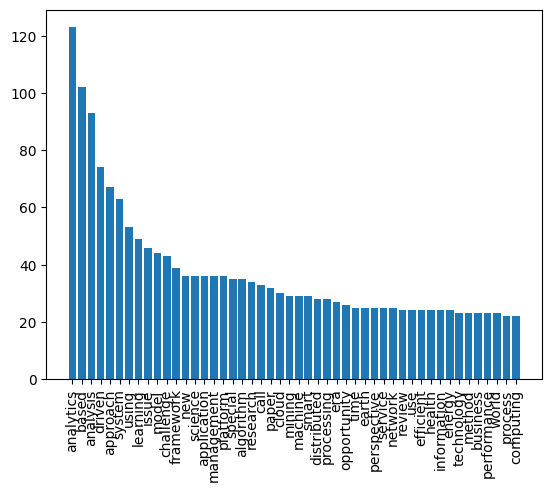

In [40]:
del word_count['big']
del word_count['data']

plt.bar(range(len(word_count)),word_count.values(),align='center')
plt.xticks(range(len(word_count)),word_count.keys(),rotation='vertical')
plt.show()

<h3> 2. 연도별 'big data' 관련 학술 문서 수 그래프 그리기 </h3>

In [41]:
all_files_data_concat['doc_count']=0
summary_year=all_files_data_concat.groupby('출판일',as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,2003,1
1,2004,2
2,2011,5
3,2012,20
4,2013,50
5,2014,110
6,2015,80
7,2016,121
8,2017,129
9,2018,111


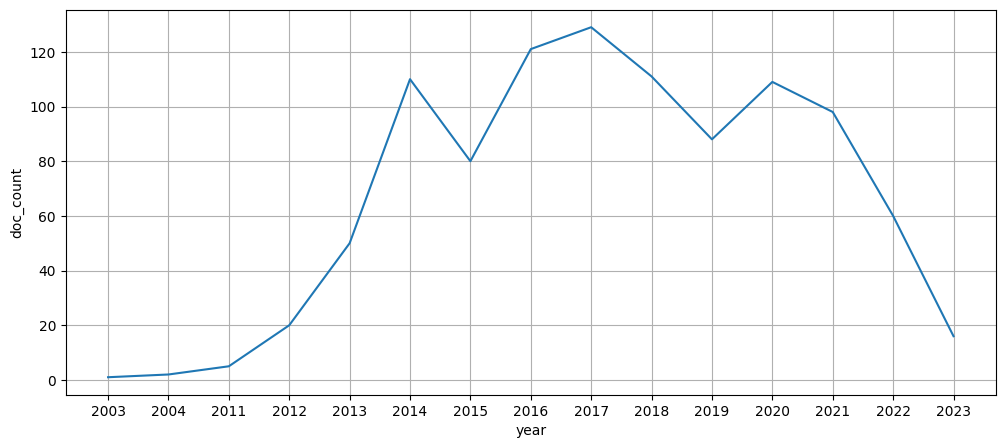

In [42]:
plt.figure(figsize = (12, 5))

plt.xlabel('year')
plt.ylabel('doc_count')

plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), summary_year['출판일'])

plt.show()

<h3> 3. 워드클라우드 그리기 </h3>

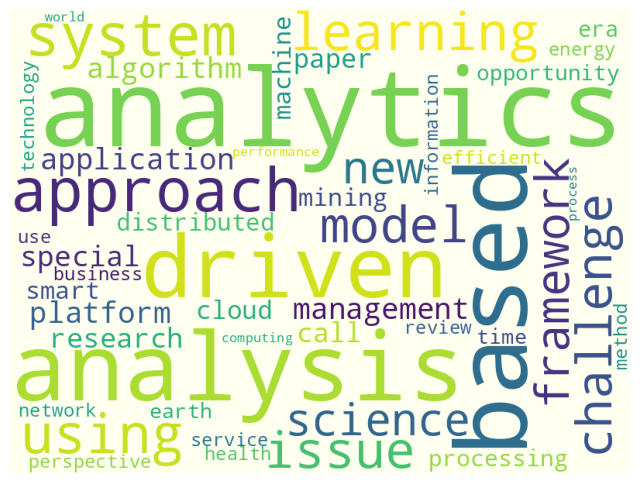

In [43]:
stopwords = set(STOPWORDS)

wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')

plt.show()

In [44]:
cloud.to_file("/content/drive/MyDrive/Colab Notebooks/Github/Data_Analysis/ThesisKeywords/riss_bigdata_wordCloud.jpg")